In [23]:
import pandas as pd
import csv

In [24]:
df=pd.read_csv("data/landslides.csv") 
df

,id,date,time,country_name,state/province,population,landslide_type,trigger,fatalities
0,34,3/2/07,Night,United States,Virginia,16000,Landslide,Rain,NaN
1,42,3/22/07,NaN,United States,Ohio,17288,Landslide,Rain,NaN
2,56,4/6/07,NaN,United States,Pennsylvania,15930,Landslide,Rain,NaN
3,59,4/14/07,NaN,Canada,Quebec,42786,Riverbank collapse,Rain,NaN
4,61,4/15/07,NaN,United States,Kentucky,6903,Landslide,Downpour,0.0
...,...,...,...,...,...,...,...,...,...
1688,7535,12/7/15,NaN,United States,North Carolina,1646,Rockfall,NaN,0.0
1689,7537,2/22/16,0:00,United States,West Virginia,51400,Mudslide,Unknown,0.0
1690,7539,2/23/16,NaN,United States,West Virginia,2406,Landslide,Rain,0.0
1691,7540,2/26/16,21:06,United States,West Virginia,1048,Rockfall,Unknown,0.0


In [25]:
df.isnull()
df.isnull().sum()

id                   0
date                 3
time              1064
country_name         0
state/province       1
population           0
landslide_type       1
trigger              2
fatalities         247
dtype: int64

In [26]:
df= df[~df['date'].isnull()]

In [27]:
df["time"]=df["time"].fillna("Not Known")

/var/folders/4c/4rgm01vd5x5c34jyt7ld15y40000gn/T/ipykernel_6726/3970381766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["time"]=df["time"].fillna("Not Known")


In [28]:
df

,id,date,time,country_name,state/province,population,landslide_type,trigger,fatalities
0,34,3/2/07,Night,United States,Virginia,16000,Landslide,Rain,NaN
1,42,3/22/07,Not Known,United States,Ohio,17288,Landslide,Rain,NaN
2,56,4/6/07,Not Known,United States,Pennsylvania,15930,Landslide,Rain,NaN
3,59,4/14/07,Not Known,Canada,Quebec,42786,Riverbank collapse,Rain,NaN
4,61,4/15/07,Not Known,United States,Kentucky,6903,Landslide,Downpour,0.0
...,...,...,...,...,...,...,...,...,...
1688,7535,12/7/15,Not Known,United States,North Carolina,1646,Rockfall,NaN,0.0
1689,7537,2/22/16,0:00,United States,West Virginia,51400,Mudslide,Unknown,0.0
1690,7539,2/23/16,Not Known,United States,West Virginia,2406,Landslide,Rain,0.0
1691,7540,2/26/16,21:06,United States,West Virginia,1048,Rockfall,Unknown,0.0


In [31]:
df["Parsed_data"] = pd.to_datetime(df["date"],format="%m/%d/%y")
df["Parsed_data"]

/var/folders/4c/4rgm01vd5x5c34jyt7ld15y40000gn/T/ipykernel_6726/2588191140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Parsed_data"] = pd.to_datetime(df["date"],format="%m/%d/%y")


0      2007-03-02
1      2007-03-22
2      2007-04-06
3      2007-04-14
4      2007-04-15
          ...    
1688   2015-12-07
1689   2016-02-22
1690   2016-02-23
1691   2016-02-26
1692   2016-03-02
Name: Parsed_data, Length: 1690, dtype: datetime64[ns]

In [32]:
month_of_IsSlide= df["Parsed_data"].dt.month
month_of_IsSlide

0        3
1        3
2        4
3        4
4        4
        ..
1688    12
1689     2
1690     2
1691     2
1692     3
Name: Parsed_data, Length: 1690, dtype: int32

AttributeError: Rectangle.set() got an unexpected keyword argument 'dist'

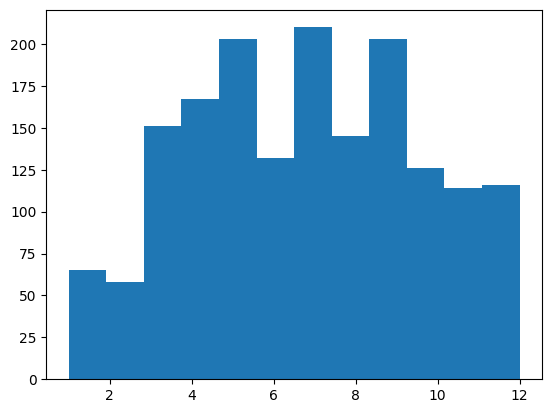

In [34]:
import matplotlib.pyplot as plt
month_of_IsSlide= month_of_IsSlide.dropna()
month_of_IsSlide.hist(bins=12)
plt.show()